In [3]:
import numpy as np
import yt
import glob
from yt.funcs import mylog
mylog.setLevel(40)
import matplotlib.pyplot as plt

# assign units to yt

units_override = {"length_unit": (1.0, 'cm'), 
                 "time_unit": (1.0,"s"), 
                 "mass_unit": (1.0,"g")}

# Remove those pesky warnings

import warnings
import matplotlib.cbook
warnings.filterwarnings("ignore",category=matplotlib.cbook.mplDeprecation)

# These are for making the plots dark mode :) just comment them out if you don't want them

# plt.style.use('dark_background')
plt.rcParams['mathtext.fontset'] = 'stix'
plt.rcParams['font.family'] = 'STIXGeneral'
plt.rcParams['font.size'] = 22

In [4]:
ds1 = yt.load("../RUN4-2xres/kh-slip.out2.00100.athdf") 
ds2 = yt.load("../RUN6-b2xres/kh-slip.out2.00100.athdf") 

yt : [ERROR    ] 2021-08-13 14:57:49,326 None of the arguments provided to load() is a valid file
yt : [ERROR    ] 2021-08-13 14:57:49,327 Please check that you have used a correct path


YTOutputNotIdentified: Supplied ('../RUN4-2xres/kh-slip.out2.00100.athdf',) {}, but could not load!

In [3]:
import glob # this library allows us to pull in lots of files automatically

alldatafiles1 = glob.glob("../RUN1/kh-slip.out2.*.athdf") 
#glob.glob grabs all files of format given by string argument where * is a wildcard
alldatafiles1.sort() #put files in order
print(len(alldatafiles1)-1)

ds1_all = [] #create empty array
for i, file in enumerate(alldatafiles1): #enumerate through all files in alldatafiles array
    ytobj = yt.load(file,units_override=units_override) #load each file using yt.load
    ds1_all.append(ytobj) #append data set to ds_all array
print("Loading a Success")


50
Loading a Success


In [4]:
alldatafiles2 = glob.glob("../RUN3-b/kh-slip.out2.*.athdf") 
#glob.glob grabs all files of format given by string argument where * is a wildcard
alldatafiles2.sort() #put files in order
print(len(alldatafiles2)-1)

ds2_all = [] #create empty array
for i, file in enumerate(alldatafiles2): #enumerate through all files in alldatafiles array
    ytobj = yt.load(file,units_override=units_override) #load each file using yt.load
    ds2_all.append(ytobj) #append data set to ds_all array
print("Loading a Success")

50
Loading a Success


# Rhos Histograms

In [5]:
# construct an array of the mean rho for each frame of the sim (this is just a list comprehension)
rhos = np.array([np.mean(ds1_all[i].r["rho"]) for i in range(len(ds1_all))])
rhosb = np.array([np.mean(ds2_all[i].r["rho"]) for i in range(len(ds2_all))])

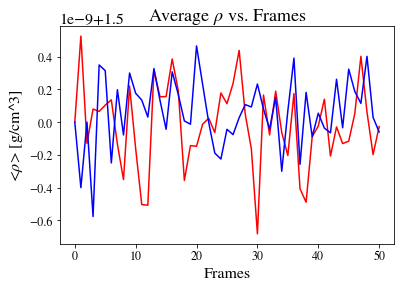

In [45]:
frame_nums = np.arange(0,51,1)

plt.figure(figsize=(6,4))
plt.title("Average $\\rho$ vs. Frames",fontsize=18)
plt.xlabel("Frames",fontsize=16)
plt.ylabel("<$\\rho$> [g/cm^3]",fontsize=16)
plt.plot(frame_nums, rhos, color='red')



#plt.savefig('Average_rho.png', format='png', dpi=300, bbox_inches='tight')
#plt.show()

#frame_nums = np.arange(0,51,1)

#plt.figure(figsize=(9,5))
#plt.title("Average $\\rho$ vs. Frames",fontsize=20)
#plt.xlabel("Frames",fontsize=18)
#plt.ylabel("<$\\rho$> [g/cm^3]",fontsize=18)
plt.plot(frame_nums, rhosb, color='blue')
#plt.offsetText.set_fontsize(16)
#plt.rc('font', size=16)
plt.tick_params(labelsize=12)
plt.savefig("rhosplt.png")
#plt.ticklabel_format(labelsize=14)
#plt.savefig('Average_rho.png', format='png', dpi=300, bbox_inches='tight')
plt.show()



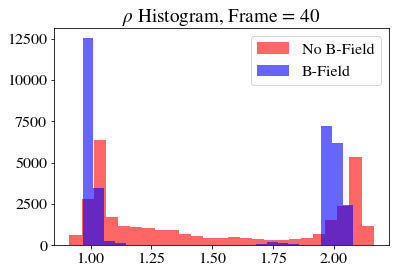

In [44]:


frame_num = 40



plt.figure(figsize=(6,4))
plt.title("$\\rho$ Histogram, Frame = " + str(frame_num))
plt.hist(np.array(ds1_all[frame_num].r["rho"]),bins=25,  color='red', alpha=0.6, label='No B-Field')
plt.hist(np.array(ds2_all[frame_num].r["rho"]),bins=25,  color='blue', alpha = 0.6, label='B-Field')
plt.legend()
plt.savefig("rhos.png")

#f.tight_layout()
plt.show()



In [8]:
###kh_rhos = np.array(ds1_all[frame_num].r["rho"])
#khb_rhos = np.array(ds2_all[frame_num].r["rho"])

#fig, axes = plt.subplots(1, 2)

#kh_rhos(np.array(ds1_all[frame_num].r["rho"]),bins=25,  color='red')
#khb_rhos(np.array(ds2_all[frame_num].r["rho"]),bins=25,  color='red')

# Pressure Histograms

In [9]:
press = np.array([np.mean(ds1_all[i].r["press"]) for i in range(len(ds1_all))])
pressb = np.array([np.mean(ds2_all[i].r["press"]) for i in range(len(ds2_all))])

print(press)

[2.5        2.50003285 2.5000515  2.50006634 2.5000796  2.50009155
 2.50010263 2.50011265 2.50012288 2.50013334 2.50014391 2.50015593
 2.50017075 2.50018796 2.50020964 2.50023914 2.50028351 2.50034982
 2.50044534 2.50057355 2.50074437 2.50096648 2.50123954 2.50154924
 2.50190129 2.50228012 2.50266417 2.50304485 2.50343003 2.50382293
 2.5042242  2.50459724 2.50494369 2.50528312 2.50560879 2.50589455
 2.50612464 2.50634436 2.50641823 2.50645739 2.50667314 2.50681678
 2.50683505 2.50695011 2.50715901 2.50739297 2.50769117 2.50794804
 2.50791411 2.50789008 2.50796129]


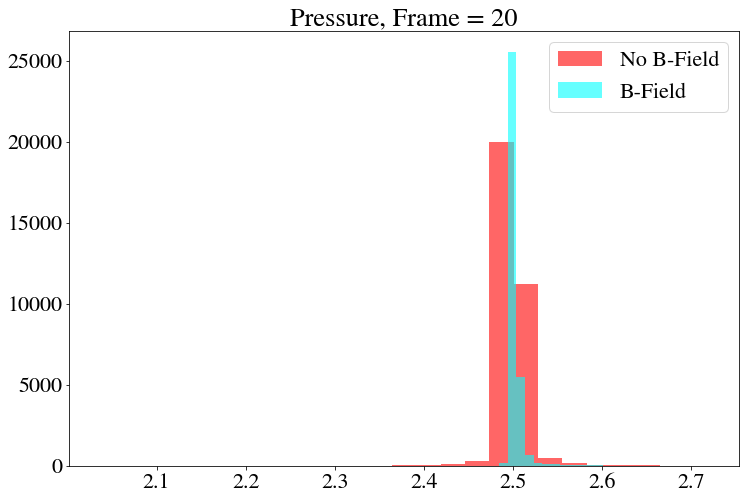

In [10]:

frame_num = 20



plt.figure(figsize=(12,8))
plt.title("Pressure, Frame = " + str(frame_num))
plt.hist(np.array(ds1_all[frame_num].r["press"]),bins=25,  color='red', alpha=.6, label="No B-Field")
plt.hist(np.array(ds2_all[frame_num].r["press"]),bins=25,  color='cyan', alpha=.6, label="B-Field")
plt.legend()





plt.show()


# Velocity Histograms

In [11]:
vel1 = np.array([np.mean(ds1_all[i].r["vel1"]) for i in range(len(ds1_all))])
vel1b = np.array([np.mean(ds2_all[i].r["vel1"]) for i in range(len(ds2_all))])

print(vel1)

[ 1.27894054e-06 -6.12531730e-05 -1.10168106e-04 -1.47662422e-04
 -1.84178117e-04 -2.18548907e-04 -2.42741396e-04 -2.60979058e-04
 -2.84481102e-04 -3.11135607e-04 -3.39703643e-04 -3.74855434e-04
 -4.13428310e-04 -4.50767895e-04 -5.00041057e-04 -5.73601533e-04
 -6.86292148e-04 -8.79328061e-04 -1.20311544e-03 -1.72045919e-03
 -2.55649849e-03 -3.90084294e-03 -5.96536334e-03 -8.85719352e-03
 -1.27896987e-02 -1.78654665e-02 -2.39251716e-02 -3.08860191e-02
 -3.87349444e-02 -4.72781332e-02 -5.64293489e-02 -6.59885263e-02
 -7.63627308e-02 -8.69650958e-02 -9.77540508e-02 -1.08617318e-01
 -1.18919998e-01 -1.27543494e-01 -1.34735686e-01 -1.40984886e-01
 -1.46705801e-01 -1.52260725e-01 -1.57251179e-01 -1.60800086e-01
 -1.63190580e-01 -1.65759856e-01 -1.67660937e-01 -1.67294391e-01
 -1.65341990e-01 -1.63996461e-01 -1.64142818e-01]


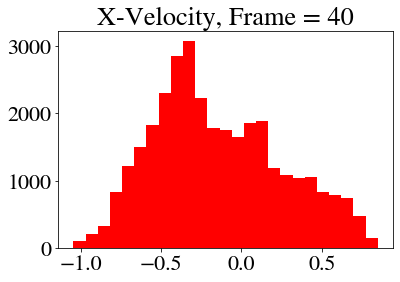

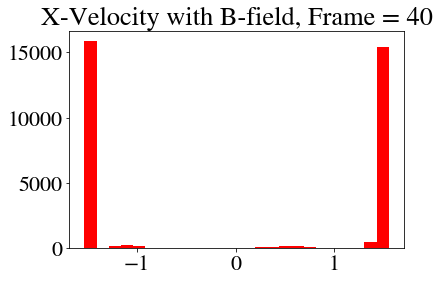

In [12]:

frame_num = 40


plt.figure(figsize=(6,4))
plt.title("X-Velocity, Frame = " + str(frame_num))
plt.hist(np.array(ds1_all[frame_num].r["vel1"]),bins=25,  color='red')


plt.figure(figsize=(6,4))
plt.title("X-Velocity with B-field, Frame = " + str(frame_num))
plt.hist(np.array(ds2_all[frame_num].r["vel1"]),bins=25,  color='red')


plt.show()


In [13]:
vel2 = np.array([np.mean(ds1_all[i].r["vel2"]) for i in range(len(ds1_all))])
vel2b = np.array([np.mean(ds2_all[i].r["vel2"]) for i in range(len(ds2_all))])

print(vel2)

[ 1.61453805e-05  1.74269511e-05  2.42233596e-05  2.42461494e-05
  2.68400807e-05  1.88669522e-05  1.76435757e-05  1.74012473e-05
  2.27871667e-05  2.74127790e-05  2.48976872e-05  2.21529605e-05
  1.77453188e-05  1.74889490e-05  2.22457124e-05  2.84923252e-05
  2.75514240e-05  1.96867865e-05 -1.15179198e-05 -8.01532883e-05
 -2.10466780e-04 -3.99619901e-04 -6.25478922e-04 -8.44189600e-04
 -1.08237989e-03 -1.33703241e-03 -1.55705325e-03 -1.76883404e-03
 -1.90353765e-03 -1.86658122e-03 -1.83149897e-03 -1.94697767e-03
 -1.86703735e-03 -7.34118104e-04  1.42213760e-03  3.48597007e-03
  4.37801581e-03  4.01790802e-03  3.88308440e-03  4.92578382e-03
  6.57197216e-03  7.98535912e-03  8.21465351e-03  7.33751241e-03
  5.57138380e-03  3.69466790e-03  2.27190187e-03  1.81832571e-03
  1.92359493e-03  1.67658996e-03  2.41675054e-04]


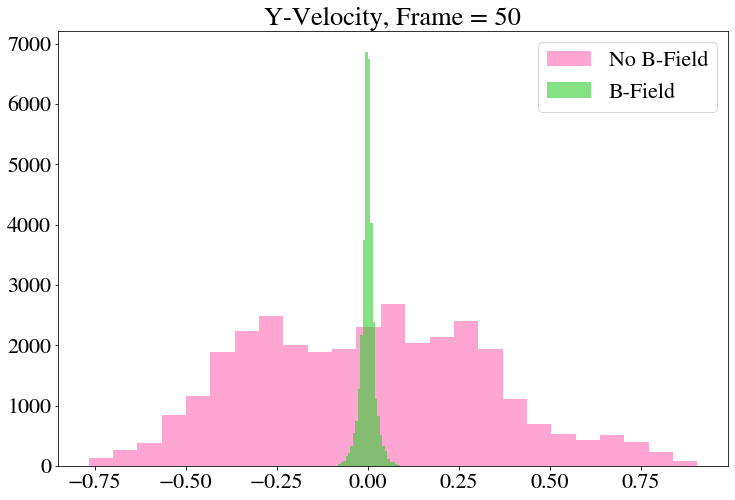

In [14]:

frame_num = 50


plt.figure(figsize=(12,8))
plt.title("Y-Velocity, Frame = " + str(frame_num))
plt.hist(np.array(ds1_all[frame_num].r["vel2"]),bins=25,  color='hotpink', alpha=.6, label="No B-Field")
plt.hist(np.array(ds2_all[frame_num].r["vel2"]),bins=25,  color='limegreen', alpha=.6, label="B-Field")
plt.legend()



plt.show()

In [15]:
vel3 = np.array([np.mean(ds1_all[i].r["vel3"]) for i in range(len(ds1_all))])
vel3b = np.array([np.mean(ds2_all[i].r["vel3"]) for i in range(len(ds2_all))])

print(vel3)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0.]


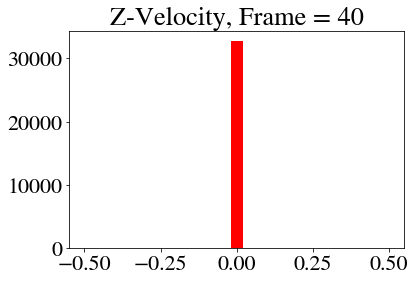

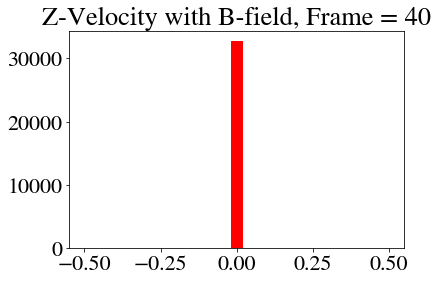

In [16]:

frame_num = 40


plt.figure(figsize=(6,4))
plt.title("Z-Velocity, Frame = " + str(frame_num))
plt.hist(np.array(ds1_all[frame_num].r["vel3"]),bins=25,  color='red')


plt.figure(figsize=(6,4))
plt.title("Z-Velocity with B-field, Frame = " + str(frame_num))
plt.hist(np.array(ds2_all[frame_num].r["vel3"]),bins=25,  color='red')


plt.show()

AttributeError: 'AxesSubplot' object has no attribute 'fasdl'

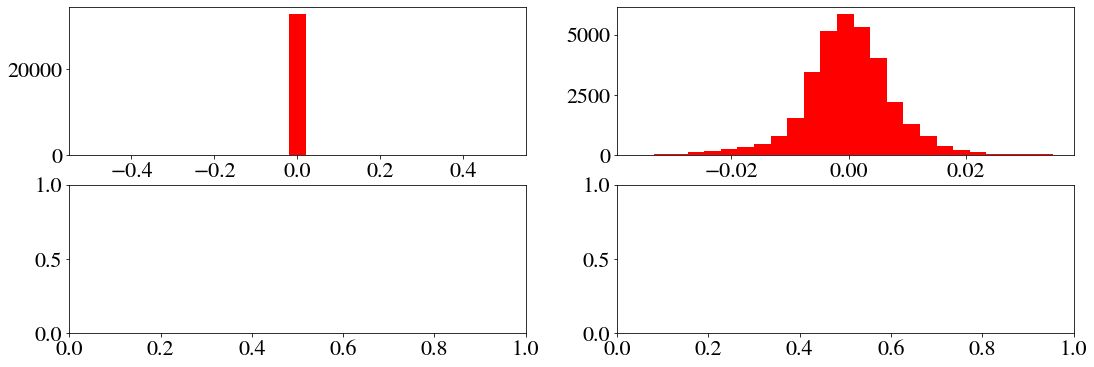

In [17]:
f, ((ax1,ax2), (ax3, ax4)) = plt.subplots(2,2, figsize=(18,6))


ax1.hist(np.array(ds2_all[frame_num].r["vel3"]),bins=25,  color='red')

ax2.hist(np.array(ds2_all[frame_num].r["vel2"]),bins=25,  color='red')

ax3. fasdl;faksfjsdf

ax4.jskafdhafhldafd;f

f.tight_layout()
f.show()